In [1]:
#2053635任柯睿
import torch 
import numpy as np
import pandas as pd
import json
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### **读取数据**
#### 读取数据集tmdb_5000_credits.csv和tmdb_5000_movies.csv并去除无关因素。

In [2]:
np.random.seed(555)
df1=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_credits.csv')
df2=pd.read_csv('../input/tmdb-movie-metadata/tmdb_5000_movies.csv')
y=df2['vote_average'].astype(float)
ls=['budget', 'genres','original_language','popularity', 'release_date','revenue', 'runtime','status','vote_count']
df=df2.loc[:,ls]
df

,budget,genres,original_language,popularity,release_date,revenue,runtime,status,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,162.0,Released,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,169.0,Released,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,148.0,Released,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,165.0,Released,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,132.0,Released,2124
...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",es,14.269792,1992-09-04,2040920,81.0,Released,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",en,0.642552,2011-12-26,0,85.0,Released,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",en,1.444476,2013-10-13,0,120.0,Released,6
4801,0,[],en,0.857008,2012-05-03,0,98.0,Released,7


### **数据处理**
#### 将genres中属性提取并进行分类，并将release_date等结果为离散值的属性进行独热处理。
#### 之后对缺失数据用平均值进行补充，并对结果进行01正则化，方便训练。

In [3]:
def process_jsoncols(colname):
    jsoncollist=[]
    for x in colname:
        jsoncollist.append(x['name'])
    return jsoncollist

In [4]:
df['genres'] = df['genres'].apply(json.loads, encoding="utf-8")
df['genres'] = df['genres'].apply(process_jsoncols)
df['genres'] = df['genres'].apply(lambda x: ','.join(map(str, x)))

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

In [6]:
genres_list = set()
for sstr in df['genres'].str.split(','):
    genres_list = set().union(sstr, genres_list)
genres_list = list(genres_list)
genres_list.remove('')
genres_list

['Drama',
 'Documentary',
 'Mystery',
 'Crime',
 'Music',
 'Science Fiction',
 'Fantasy',
 'Romance',
 'Adventure',
 'Action',
 'TV Movie',
 'Family',
 'War',
 'Animation',
 'Horror',
 'History',
 'Foreign',
 'Thriller',
 'Comedy',
 'Western']

In [7]:
for genres in genres_list:
    df[genres] = df['genres'].str.contains(genres).apply(lambda x:1 if x else 0)

In [8]:
ls=df.columns[df.isnull().sum()>0]
print(ls)
for s in ls:
    meantime=df[s].mean()
    df[s] = df[s].fillna(meantime)

Index(['release_date', 'runtime', 'year', 'month'], dtype='object')


In [9]:
#查看df中是否还有缺失数据
df.isnull().sum()

budget               0
genres               0
original_language    0
popularity           0
release_date         0
revenue              0
runtime              0
status               0
vote_count           0
year                 0
month                0
Drama                0
Documentary          0
Mystery              0
Crime                0
Music                0
Science Fiction      0
Fantasy              0
Romance              0
Adventure            0
Action               0
TV Movie             0
Family               0
War                  0
Animation            0
Horror               0
History              0
Foreign              0
Thriller             0
Comedy               0
Western              0
dtype: int64

In [10]:
df.drop(['release_date','genres'],axis=1,inplace=True) 
df=pd.get_dummies(df)
df = (df-df.min())/(df.max()-df.min())
df

,budget,popularity,revenue,runtime,vote_count,year,month,Drama,Documentary,Mystery,...,original_language_ta,original_language_te,original_language_th,original_language_tr,original_language_vi,original_language_xx,original_language_zh,status_Post Production,status_Released,status_Rumored
0,0.623684,0.171815,1.000000,0.479290,0.858057,0.920792,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.789474,0.158846,0.344696,0.500000,0.327225,0.900990,0.363636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.644737,0.122635,0.315884,0.437870,0.324753,0.980198,0.818182,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.657895,0.128272,0.389151,0.488166,0.662158,0.950495,0.545455,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.684211,0.050169,0.101916,0.390533,0.154450,0.950495,0.181818,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.000579,0.016298,0.000732,0.239645,0.017307,0.752475,0.727273,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4799,0.000024,0.000734,0.000000,0.251479,0.000364,0.940594,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4800,0.000000,0.001650,0.000000,0.355030,0.000436,0.960396,0.818182,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4801,0.000000,0.000979,0.000000,0.289941,0.000509,0.950495,0.363636,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
x = df.values
x = np.column_stack((np.ones(len(x)),x))

### **获得训练集和测试集**
#### 将数据以0.8:0.2的比例分为训练集和测试集。

In [12]:
#将数据分为训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

### **评估函数**
#### 计算MAE和RMSE。

In [13]:
def MAE(r,p):
    return sum(np.fabs(r-p))/len(r)

In [14]:
def RMSE(r,p):
    return np.sqrt(sum((r-p)**2)/len(r))

### **开始训练**
#### epoch=5000，lr=0.1，没100轮对预测结果进行评估。
#### 每条数据有67个属性对照，同时在第一列是一列1，用于与w相乘作为b

In [15]:
attr_num=x_train.shape[1]
w=np.zeros(attr_num)
epoch=5000
lr=0.1
print("Start training")
print("total epoch={},learning rate={}".format(epoch,lr))
mae_list=[]
rmse_list=[]
for i in range(epoch):
    e=y_train-np.dot(x_train,w)
    loss=sum(e**2)/len(x_train)
    #print(x_train.T)
    w=w-lr*(-2*np.dot(x_train.T,e)/len(x_train))
    y_test_pre=np.dot(x_test,w)
    mae=MAE(y_test,y_test_pre)
    rmse=RMSE(y_test,y_test_pre)
    if i%100==0:
        mae_list.append(mae)
        rmse_list.append(rmse)
        print("epoch{} MAE={:.3f} RMSE={:.3f}".format(i+1,mae,rmse))

Start training
total epoch=5000,learning rate=0.1
epoch1 MAE=0.952 RMSE=1.304
epoch101 MAE=0.768 RMSE=1.131
epoch201 MAE=0.728 RMSE=1.090
epoch301 MAE=0.704 RMSE=1.066
epoch401 MAE=0.689 RMSE=1.050
epoch501 MAE=0.679 RMSE=1.039
epoch601 MAE=0.672 RMSE=1.031
epoch701 MAE=0.667 RMSE=1.025
epoch801 MAE=0.663 RMSE=1.021
epoch901 MAE=0.660 RMSE=1.018
epoch1001 MAE=0.658 RMSE=1.016
epoch1101 MAE=0.657 RMSE=1.014
epoch1201 MAE=0.656 RMSE=1.013
epoch1301 MAE=0.656 RMSE=1.012
epoch1401 MAE=0.655 RMSE=1.011
epoch1501 MAE=0.655 RMSE=1.010
epoch1601 MAE=0.654 RMSE=1.009
epoch1701 MAE=0.654 RMSE=1.009
epoch1801 MAE=0.654 RMSE=1.009
epoch1901 MAE=0.653 RMSE=1.008
epoch2001 MAE=0.653 RMSE=1.008
epoch2101 MAE=0.653 RMSE=1.008
epoch2201 MAE=0.653 RMSE=1.008
epoch2301 MAE=0.653 RMSE=1.007
epoch2401 MAE=0.652 RMSE=1.007
epoch2501 MAE=0.652 RMSE=1.007
epoch2601 MAE=0.652 RMSE=1.007
epoch2701 MAE=0.652 RMSE=1.007
epoch2801 MAE=0.652 RMSE=1.007
epoch2901 MAE=0.652 RMSE=1.007
epoch3001 MAE=0.652 RMSE=1.007
e

### **绘制MAE-epoch曲线与RMSE-epoch曲线**

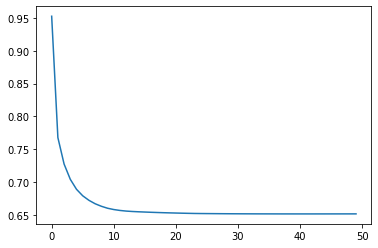

In [16]:
#MAE
plt.plot(mae_list)

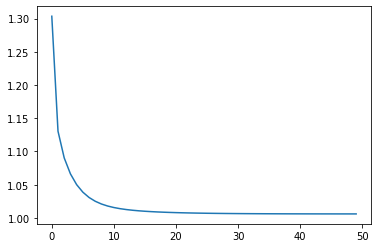

In [17]:
#RMSE
plt.plot(rmse_list)